In [2]:
using Pkg; Pkg.activate("C:\\Users\\KarlH\\Desktop\\ComputationalPhysicsMaster\\Code\\OrbitalNeuralMethods")
using Revise
using OrbitalNeuralMethods

using BenchmarkTools: @btime
import OrbitalNeuralMethods as onm
import Plots as plt

  Activating project at `C:\Users\KarlH\Desktop\ComputationalPhysicsMaster\Code\OrbitalNeuralMethods`


In [4]:
dims = 3
num = 10

HOshape = [1, 1, √8]
ham = HarmonicOscillator(dims, num, ω = 1, HOshape=HOshape)

wf = Correlated(dims, num, α = 0.4, a = 0.00433)
#wf = SimpleGaussian(dims, num, α = 0.5, HOshape=HOshape)

metro = Importance(equils = 1e4, samples = 1e5, step = 0.01)
#metro = Metropolis(equils = 1e4, samples = 1e5, step = 0.01)

Importance(10000, 100000, 0.01)

In [5]:
optimizer = GradientDescent(lr = 0.01, max_iter = 400, tol = 1e-6);
wf_opt, grad_results = optimize(wf, ham, metro, optimizer, nthreads = 8);
wf_opt.α, grad_results[end].E/num

E = 19.136 iter = 400/400 alpha = 0.6307646520009287          No convergence reached, final norm of gradient was 0.0005559203659088751


(0.6307646520009287, 1.9135913354417202)

In [16]:
@time block_result = blocking(wf_opt, ham, Importance(equils = 1e5, samples = 1e7, step = 0.01), nthreads = 8)
block_result.E/num

Length of data = 10000000 is not a power of 2, truncating to 8388608 elements
 10.545549 seconds (7.52 M allocations: 1.259 GiB, 5.73% gc time, 41.78% compilation time)


1.506880396928969

In [8]:
ob_result = onebody(wf_opt, ham, metro, start = -3, stop = 3, length = 100, nthreads = 1);
(; radius, oneBodyDensity) = ob_result;

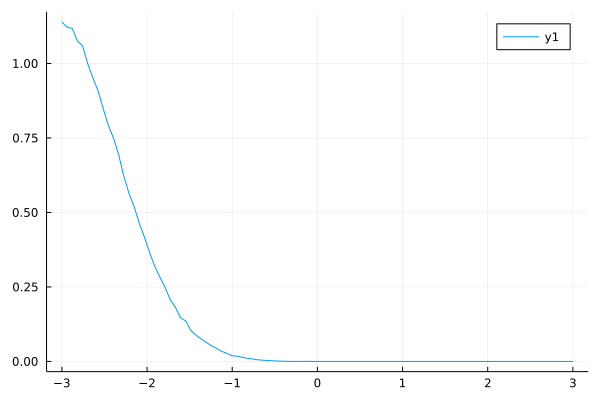

In [10]:
plt.plot(radius, oneBodyDensity)